<a href="https://colab.research.google.com/github/aman2028-cloud/Resume/blob/main/Resume_Scanning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('UpdatedResumeDataSet.csv')

In [3]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
df.shape

(962, 2)

In [5]:
df['Category'].value_counts()

,count
Category,
Java Developer,84
Testing,70
DevOps Engineer,55
Python Developer,48
Web Designing,45
HR,44
Hadoop,42
Sales,40
Data Science,40


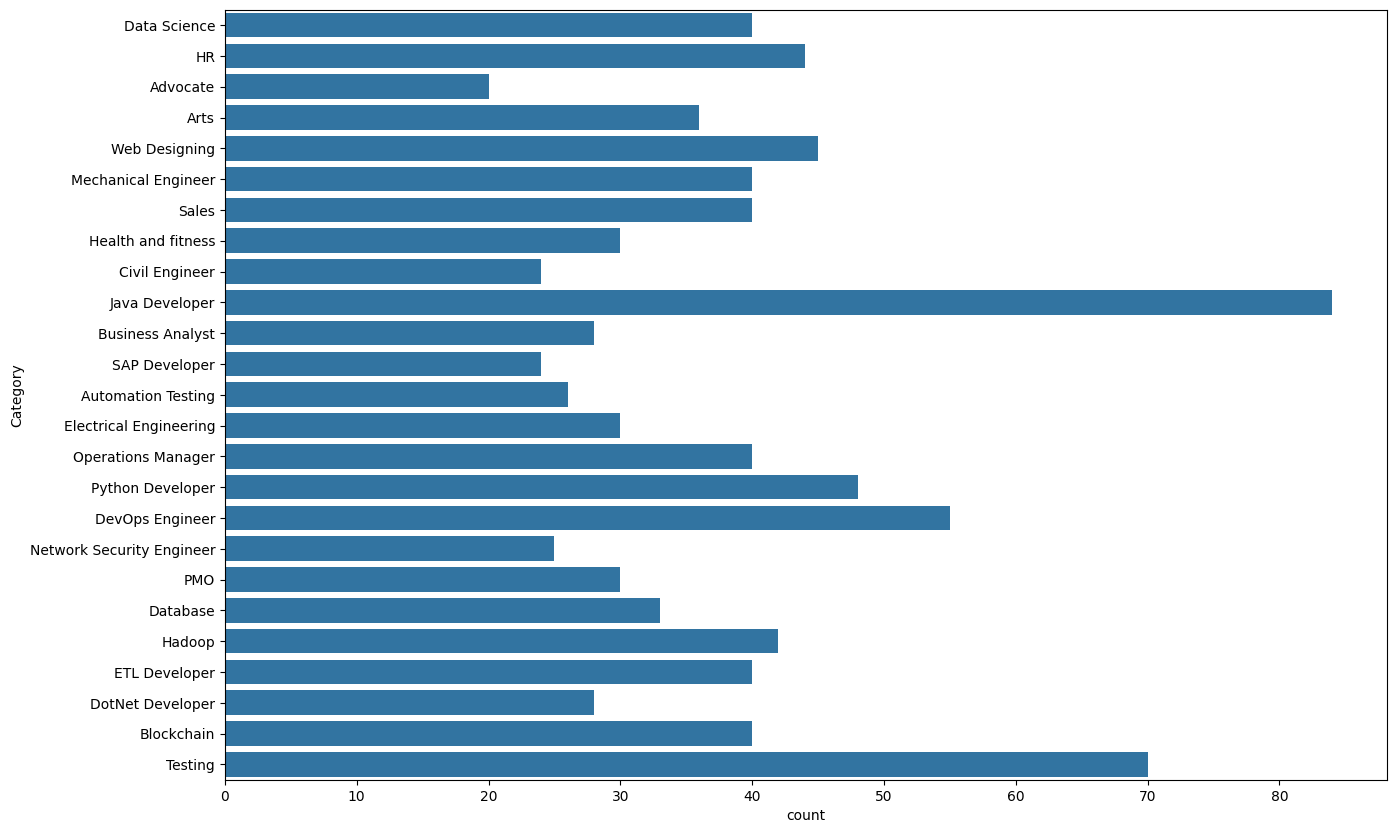

In [6]:
plt.figure(figsize=(15,10))
sns.countplot(df['Category'])
plt.show()

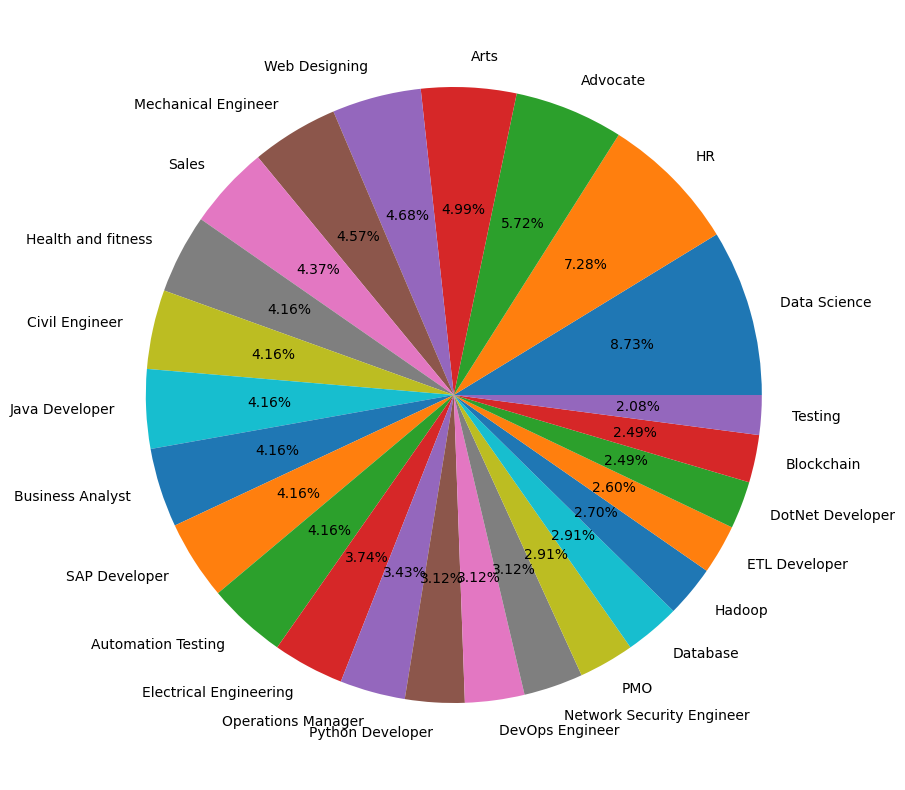

In [7]:
counts=df['Category'].value_counts()
labels=df['Category'].unique()
plt.figure(figsize=(15,10))
plt.pie(counts,labels=labels,autopct='%1.2f%%')
plt.show()

In [8]:
df['Category'][0]

'Data Science'

In [9]:
df['Resume']

,Resume
0,Skills * Programming Languages: Python (pandas...
1,Education Details \r\nMay 2013 to May 2017 B.E...
2,"Areas of Interest Deep Learning, Control Syste..."
3,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...
957,Computer Skills: â¢ Proficient in MS office (...
958,â Willingness to accept the challenges. â ...
959,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [10]:
import re
def cleanResume(txt):
    # Remove URLs
  cleanTxt = re.sub(r'http\S+', '', txt)
   # Remove hashtags
  cleanTxt = re.sub(r'#\S+', '', cleanTxt)
   # Remove mentions
  cleanTxt = re.sub(r'@\S+', '', cleanTxt)
   # Remove special characters and numbers (keep letters and spaces)
  cleanTxt = re.sub(r'[^A-Za-z\s]', ' ', cleanTxt)
  cleanTxt = re.sub(r'[^\x00-\x7f]', ' ', cleanTxt)
  cleanTxt = re.sub(r'\s+', ' ', cleanTxt)


  return cleanTxt

In [11]:
cleanResume("http://hello ## aman pahwa@gmai $l")

' aman pahwa l'

In [12]:
cleanResume(df['Resume'][0])

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience months jQuery Exprience months Python Exprience monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in accelerating the review proc

In [13]:
df['Resume']=df['Resume'].apply(lambda x:cleanResume(x))

In [14]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience months jQuery Exprience months Python Exprience monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in accelerating the review proc

In [15]:
df['Category']

,Category
0,Data Science
1,Data Science
2,Data Science
3,Data Science
4,Data Science
...,...
957,Testing
958,Testing
959,Testing
960,Testing


In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Category']=le.fit_transform(df['Category'])

In [17]:
df['Category']

,Category
0,6
1,6
2,6
3,6
4,6
...,...
957,23
958,23
959,23
960,23


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(stop_words='english')
tf.fit(df['Resume'])
req_txt=tf.transform(df['Resume'])

In [33]:
df

,Category,Resume
0,6,Skills Programming Languages Python pandas num...
1,6,Education Details May to May B E UIT RGPV Data...
2,6,Areas of Interest Deep Learning Control System...
3,6,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,Education Details MCA YMCAUST Faridabad Haryan...
...,...,...
957,23,Computer Skills Proficient in MS office Word B...
958,23,Willingness to accept the challenges Positive...
959,23,PERSONAL SKILLS Quick learner Eagerness to lea...
960,23,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


In [34]:
req_txt

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 158284 stored elements and shape (962, 7035)>

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(req_txt,df['Category'],test_size=0.2,random_state=42)

In [22]:
x_train.shape

(769, 7035)

In [23]:
x_test.shape

(193, 7035)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
knn=KNeighborsClassifier(n_neighbors=5)

In [25]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [26]:
knn.score(x_train,y_train)

0.988296488946684

In [27]:
import pickle
pickle.dump(tf,open('tf.pkl','wb'))
pickle.dump(knn,open('model.pkl','wb'))
pickle.dump(le,open('le.pkl','wb'))

In [28]:
# make a predictive system


In [29]:
import pickle
import re

# Load the saved model and vectorizer
tf = pickle.load(open('tf.pkl', 'rb'))
knn = pickle.load(open('model.pkl', 'rb'))

In [39]:
# Define a function to predict
def predict_category(resume_text):
    cleaned_resume = cleanResume(resume_text)
    transformed_resume = tf.transform([cleaned_resume]) # Transform the resume text using the loaded TF-IDF vectorizer
    prediction = knn.predict(transformed_resume)
    return prediction

# Test the predictive system
sample_resume = """Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience months jQuery Exprience months Python Exprience monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in accelerating the review process and run analytics and generate reports Core member of a team helped in developing automated review platform tool from scratch for assisting E discovery domain this tool implements predictive coding and topic modelling by automating reviews resulting in reduced labor costs and time spent during the lawyers review Understand the end to end flow of the solution doing research and development for classification models predictive analysis and mining of the information present in text data Worked on analyzing the outputs and precision monitoring for the entire tool TAR assists in predictive coding topic modelling from the evidence by following EY standards Developed the classifier models in order to identify red flags and fraud related issues Tools Technologies Python scikit learn tfidf word vec doc vec cosine similarity Na ve Bayes LDA NMF for topic modelling Vader and text blob for sentiment analysis Matplot lib Tableau dashboard for reporting MULTIPLE DATA SCIENCE AND ANALYTIC PROJECTS USA CLIENTS TEXT ANALYTICS MOTOR VEHICLE CUSTOMER REVIEW DATA Received customer feedback survey data for past one year Performed sentiment Positive Negative Neutral and time series analysis on customer comments across all categories Created heat map of terms by survey category based on frequency of words Extracted Positive and Negative words across all the Survey categories and plotted Word cloud Created customized tableau dashboards for effective reporting and visualizations CHATBOT Developed a user friendly chatbot for one of our Products which handle simple questions about hours of operation reservation options and so on This chat bot serves entire product related questions Giving overview of tool via QA platform and also give recommendation responses so that user question to build chain of relevant answer This too has intelligence to build the pipeline of questions as per user requirement and asks the relevant recommended questions Tools Technologies Python Natural language processing NLTK spacy topic modelling Sentiment analysis Word Embedding scikit learn JavaScript JQuery SqlServer INFORMATION GOVERNANCE Organizations to make informed decisions about all of the information they store The integrated Information Governance portfolio synthesizes intelligence across unstructured data sources and facilitates action to ensure organizations are best positioned to counter information risk Scan data from multiple sources of formats and parse different file formats extract Meta data information push results for indexing elastic search and created customized interactive dashboards using kibana Preforming ROT Analysis on the data which give information of data which helps identify content that is either Redundant Outdated or Trivial Preforming full text search analysis on elastic search with predefined methods which can tag as PII personally identifiable information social security numbers addresses names etc which frequently targeted during cyber attacks Tools Technologies Python Flask Elastic Search Kibana FRAUD ANALYTIC PLATFORM Fraud Analytics and investigative platform to review all red flag cases FAP is a Fraud Analytics and investigative platform with inbuilt case manager and suite of Analytics for various ERP systems It can be used by clients to interrogate their Accounting systems for identifying the anomalies which can be indicators of fraud by running advanced analytics Tools Technologies HTML JavaScript SqlServer JQuery CSS Bootstrap Node js D js DC js"""
predicted_category = predict_category(sample_resume)
print(f"The predicted category for the sample resume is: {predicted_category}")

The predicted category for the sample resume is: [6]


In [37]:
df['Category']

,Category
0,6
1,6
2,6
3,6
4,6
...,...
957,23
958,23
959,23
960,23


In [41]:
import sklearn
print(sklearn.__version__)


1.6.1


In [42]:
import nltk
print(nltk.__version__)


3.9.1


In [44]:
# Function to predict category
def predict_category(resume_text):
    cleaned_resume = cleanResume(resume_text)
    transformed_resume = tf.transform([cleaned_resume])  # Transform the resume
    pred_id = knn.predict(transformed_resume)[0]       # Predict class index

    # Map to category name
    category_mapping = {
        15:"Java Developer",
        23:"Testing",
        8:"DevOps Engineer",
        20:"Python Developer",
        24:"Web Designing",
        12:"HR",
        13:"Hadoop",
        10:"ETL Developer",
        18:"Operations Manager",
        6:"Data Science",
        22:"Sales",
        16:"Mechanical Engineer",
        1:"Arts",
        7:"Database",
        11:"Electrical Engineering",
        14:"Health and Fitness",
        19:"PMO",
        4:"Business Analyst",
        9:"DotNet Developer",
        2:"Automation Testing",
        17:"Network Security Engineer",
        21:"SAP Developer",
        5:"Civil Engineer",
        0:"Advocate",
    }

    return category_mapping.get(pred_id, "Unknown")

# Test the predictive system
sample_resume = """Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery ..."""
predicted_category = predict_category(sample_resume)
print(f"The predicted category for the sample resume is: {predicted_category}")


The predicted category for the sample resume is: Data Science
